In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Plotando as linhas equipotenciais para o caso básico (sem nenhum objeto entre as placas parelelas):</h2>

In [26]:
basico_df = pd.read_excel('./dados/experimento_base.xlsx')
basico_df.head()

,y,x,mV
0,1,0,215
1,1,3,185
2,1,6,175
3,1,9,167
4,1,12,166


In [161]:
def plot_contour(df):
  '''
  Plota uma curva de nivel usando os dados de df
  '''
  plt.tricontour(df['x'], df['y'], df['mV'])

  # plt.plot(df['x'], basico_df['y'], ls='', marker='.') # Plota cada ponto q foi utilizado para criar as curvas

  plt.ylim(bottom=0)
  plt.xlabel('X(cm)')
  plt.ylabel('Y(cm)')

  plt.show()

<h3>Distribuição dos pontos que foram utilizados para coletar os dados</h3>

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='x', ylabel='y'>

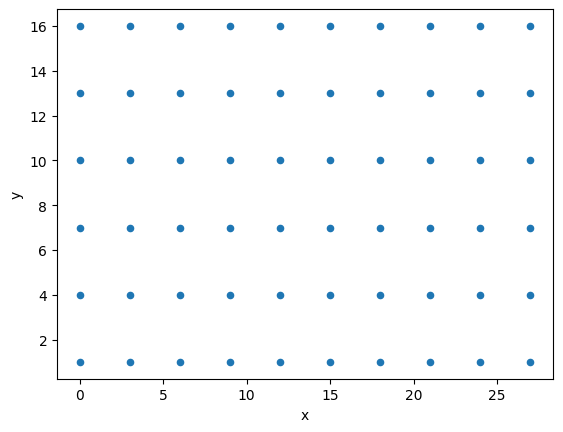

In [162]:
basico_df.plot(kind='scatter', x='x', y='y')

<h3>As linhas equipotenciais desse experimento</h3>

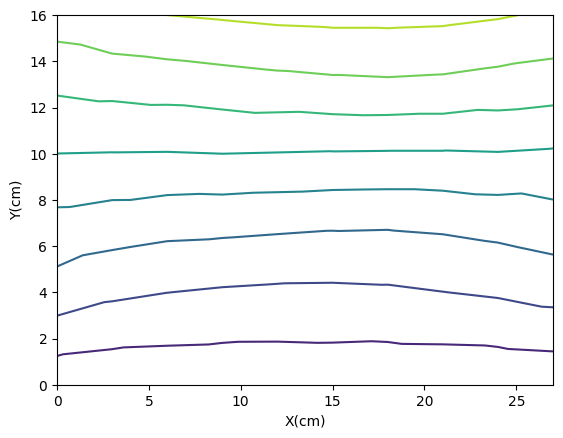

In [131]:
plot_contour(basico_df)

<h2>Plotando as linhas equipotenciais para o caso com a ponta entre as placas paralelas:</h2>

In [137]:
partial_ponta_df = pd.read_excel('./dados/experimento_ponta.xlsx')
partial_ponta_df.head()

,y,x,mV
0,1,0.0,225
1,1,3.0,204
2,1,6.0,183
3,1,8.0,171
4,1,9.0,155


In [125]:
def sum_and_append(arr, value, increment, iterations):
  for _ in range(iterations):
    value += increment
    arr.append(value)
  
  return value

In [149]:
def complete_df(df):
  '''
  Recebe um df que possui os dados da coluna x incompletos(so foram medidos até metade da folha) e os da coluna y completos, com isso completa 
  df obtendo os pontos faltantes a partir dos pontos coletados utilizando simetria
  '''

  y_vals = df['y'].unique()

  final_df = pd.DataFrame(columns=['x', 'y', 'mV']) # cria o df q sera o output

  for val in y_vals:
    selected_y_val_df = df[df['y'] == val].sort_values(by='x') # pega apenas as linhas com um valor de y especifico

    decrescent_x_vals = list(selected_y_val_df['x'].sort_values(ascending=False))

    # esses sao os unicos intervalos possiveis dos df que serão utilizados
    sum_half = 0 # numero de vezes que deve somar .5
    sum_one = 0 # numero de vezes que deve somar 1
    sum_two = 0 # numero de vezes que deve somar 2
    sum_three = 0 # numero de vezes que deve somar 3

    for i in range(len(decrescent_x_vals) - 1):
      diference = decrescent_x_vals[i] - decrescent_x_vals[i + 1]

      if diference == 3:
        sum_three += 1
      elif diference == 2:
        sum_two += 1
      elif diference == 1:
        sum_one += 1
      elif diference == .5:
        sum_half += 1

    max_x_val = int(df['x'].max()) # pega o maior valor de x para ir fazendo as adicoes

    y_vals = np.array([val] * (sum_half + sum_one + sum_two + sum_three))

    # cria um array com os novos valores de x
    x_vals = []
    max_x_val = sum_and_append(x_vals, max_x_val, .5, sum_half)
    max_x_val = sum_and_append(x_vals, max_x_val, 1, sum_one)
    max_x_val = sum_and_append(x_vals, max_x_val, 2, sum_two)
    max_x_val = sum_and_append(x_vals, max_x_val, 3, sum_three)
    x_vals = np.array(x_vals)

    inverted_mv = np.array(selected_y_val_df['mV'][-2::-1])

    inverted_selected_df = pd.DataFrame({'y': y_vals, 'x': x_vals, 'mV': inverted_mv})
    
    final_selected_df = pd.concat([selected_y_val_df, inverted_selected_df])

    final_df = pd.concat([final_df, final_selected_df])

  return final_df.astype(int)

In [150]:
ponta_df = complete_df(partial_ponta_df)

<h3>Distribuição dos pontos que foram utilizados para coletar os dados</h3>

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='x', ylabel='y'>

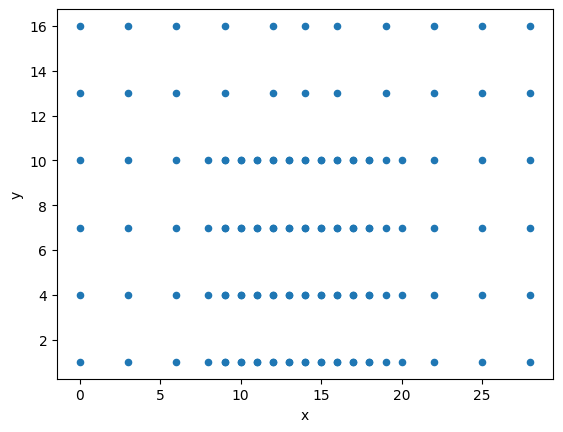

In [151]:
ponta_df[['x', 'y']].plot(kind='scatter', x='x', y='y')

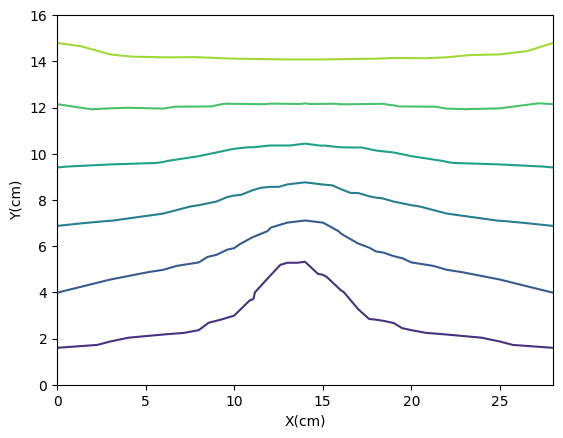

In [153]:
plot_contour(ponta_df)

Plotando as linhas equipotenciais para o caso do anel

In [156]:
partial_ring_df = pd.read_excel('./dados/experimento_anel.xlsx')
partial_ring_df.head()

,y,x,mV
0,1,0,209
1,1,3,186
2,1,6,185
3,1,9,181
4,1,12,199


In [157]:
ring_df = complete_df(partial_ring_df)

<h3>Distribuição dos pontos que foram utilizados para coletar os dados</h3>

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='x', ylabel='y'>

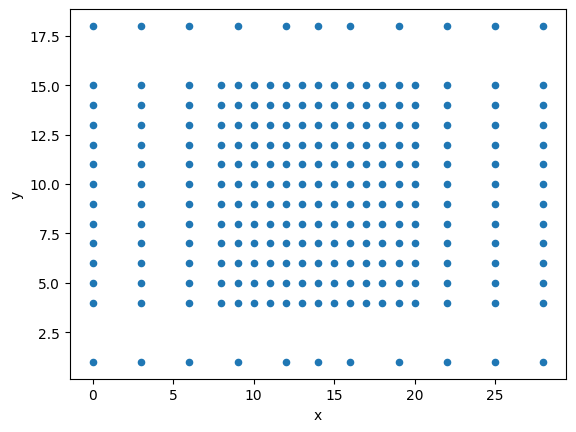

In [158]:
ring_df.plot(kind='scatter', x='x', y='y')

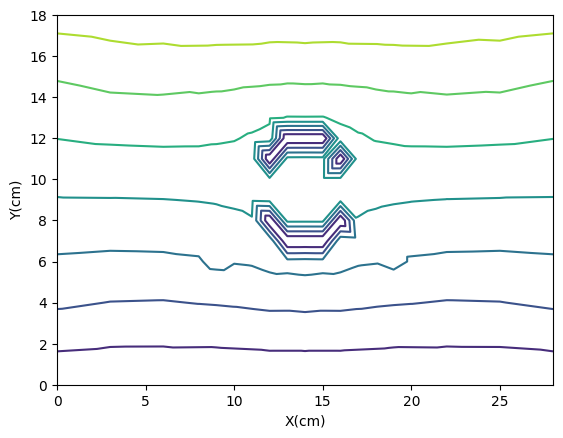

In [160]:
plot_contour(ring_df)